<a href="https://colab.research.google.com/github/prashanth-ds-ml/Projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(x_train))
print(len(x_test))

60000
10000


In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train / 255
x_test = x_test / 255

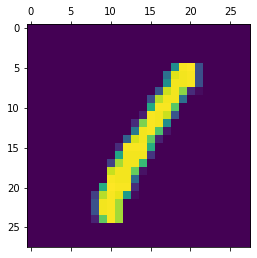

In [7]:
plt.matshow(x_train[3])
plt.show()

In [8]:
y_train[2]

4

In [9]:
flattened_x_train = x_train.reshape(len(x_train),28*28)
flattened_x_test = x_test.reshape(len(x_test),28*28)

print(flattened_x_train,'\n')
print(flattened_x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
flattened_x_train.shape

(60000, 784)

In [11]:
flattened_x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
hist = model.fit(x_train, y_train,batch_size = 32, epochs=5,callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2400 - accuracy: 0.9288
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1025 - accuracy: 0.9686
Epoch 3/5
1864/1875 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9769
Reached 97% accuracy so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0740 - accuracy: 0.9769


In [16]:
y_predicted = model.predict(x_test)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.0033364e-06, 8.0194171e-05, 1.8317744e-05, 2.0838270e-04,
       7.8606246e-07, 8.6092160e-07, 7.7370782e-10, 9.9931461e-01,
       4.4826142e-05, 3.2898458e-04], dtype=float32)

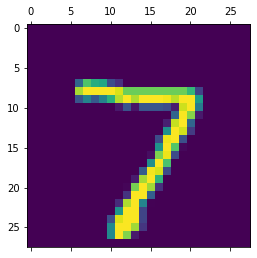

In [17]:
plt.matshow(x_test[0])

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [21]:
c_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
c_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    0,    0,    2,    4,    1,    2,    4],
       [   0, 1118,    2,    1,    0,    0,    1,    0,   13,    0],
       [   9,    0,  999,    3,    4,    1,    5,    3,    6,    2],
       [   1,    0,    5,  983,    0,    0,    0,    6,    7,    8],
       [   3,    0,    1,    0,  955,    0,    6,    2,    0,   15],
       [   3,    0,    0,   13,    1,  846,    5,    0,   16,    8],
       [   4,    4,    1,    1,    8,    3,  928,    2,    7,    0],
       [   1,    3,    5,    1,    1,    0,    0,  996,    3,   18],
       [   2,    0,    2,    4,    3,    3,    1,    1,  953,    5],
       [   2,    2,    0,    2,    5,    1,    0,    4,    1,  992]],
      dtype=int32)>

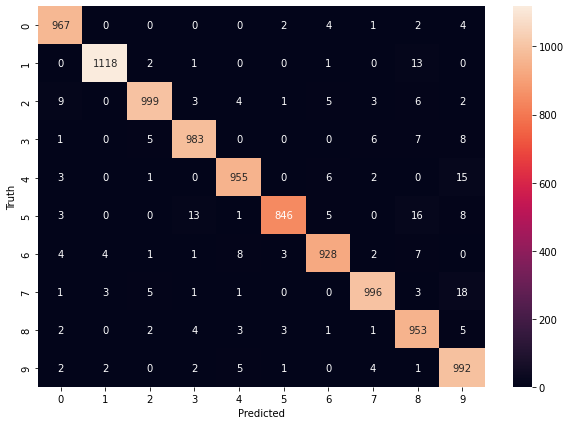

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sb.heatmap(c_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()